In [1]:
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier

In [2]:
PROJECT_ROOT_DIR = "H:\Advanced Data Analytics\Week 5"
CHAPTER_ID = "Chapter5SVM"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#C1D0FF')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [4]:
iris = datasets.load_iris()
x = iris["data"][:, (2, 3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [5]:
C = 5
alpha = 1 / (C*len(x))

In [6]:
scaler = StandardScaler()
linsvc_clf = LinearSVC(C=1, loss="hinge", random_state=42)

scaled_linsvc_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", linsvc_clf),
    ])

scaled_linsvc_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [7]:
b = linsvc_clf.decision_function([-scaler.mean_ / scaler.scale_])
w = linsvc_clf.coef_[0] / scaler.scale_
linsvc_clf.intercept_ = np.array([b])
linsvc_clf.coef_ = np.array([w])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (x.dot(w) + b) < 1).ravel()
linsvc_clf.support_vectors_ = x[support_vectors_idx1]

Saving figure 8. Linear SVC


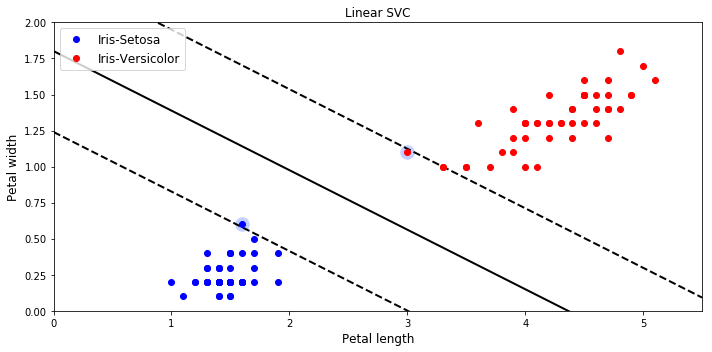

In [8]:
plt.figure(figsize = (10, 5))
plot_svc_decision_boundary(linsvc_clf, 0, 5.5)
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bo", label="Iris-Setosa")
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "ro", label="Iris-Versicolor")
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.title("Linear SVC", fontsize = 12)
plt.axis([0, 5.5, 0, 2])

save_fig("8. Linear SVC")
plt.show()

In [9]:
scaler = StandardScaler()
svc_clf = SVC(kernel = "linear", C = C)

scaled_svc_clf = Pipeline([
        ("scaler", scaler),
        ("svc", svc_clf),
    ])

scaled_svc_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [10]:
b = svc_clf.decision_function([-scaler.mean_ / scaler.scale_])
w = svc_clf.coef_[0] / scaler.scale_
svc_clf.intercept_ = np.array([b])
#svc_clf.coef_ = np.array([w])

t = y * 2 - 1
support_vectors_idx1 = (t * (x.dot(w) + b) < 1).ravel()
svc_clf.support_vectors_ = x[support_vectors_idx1]

In [11]:
plt.figure(figsize = (10, 5))
plot_svc_decision_boundary(svc_clf, 0, 5.5)
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bo", label="Iris-Setosa")
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "ro", label="Iris-Versicolor")
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.title("SVC", fontsize = 12)
plt.axis([0, 5.5, 0, 2])

save_fig("8. SVC")
plt.show()

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

<Figure size 720x360 with 0 Axes>

In [ ]:
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)

sgd_clf.fit(x, y)

In [ ]:
b = sgd_clf.decision_function([-scaler.mean_ / scaler.scale_])
w = sgd_clf.coef_[0] / scaler.scale_
sgd_clf.intercept_ = np.array([b])
sgd_clf.coef_ = np.array([w])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (x.dot(w) + b) < 1).ravel()
sgd_clf.support_vectors_ = x[support_vectors_idx1]

In [ ]:
plt.figure(figsize = (10, 5))
plot_svc_decision_boundary(sgd_clf, 0, 5.5)
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bo", label="Iris-Setosa")
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "ro", label="Iris-Versicolor")
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.title("SGD Classifier", fontsize = 12)
plt.axis([0, 5.5, 0, 2])

save_fig("8. SGD Classifier")
plt.show()